In [1]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer='../input/s-and-p-500-all-assets/SnP500 All assets.csv', index_col=[0], skiprows=[0, 2])
df.index = pd.to_datetime(df.index)
# drop the columns that have periods in them
df = df[[column for column in df.columns if '.' not in column]]
df.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2010-01-04,20.229710,4.496876,36.703857,6.496294,NaN,21.769251,19.336399,7.994444,32.708153,37.090000,...,41.868587,13.286601,41.319061,32.008991,NaN,19.435671,52.905678,28.670000,10.851061,NaN
2010-01-05,20.009954,5.005957,36.485699,6.507525,NaN,21.613935,19.180172,7.967778,32.910305,37.700001,...,44.415005,13.129032,41.480389,31.628475,NaN,19.369205,54.580452,28.620001,11.233658,NaN
2010-01-06,19.938871,4.798553,36.803848,6.404016,NaN,21.409571,19.286690,7.933333,33.260162,37.619999,...,43.832409,13.154244,41.838913,31.836838,NaN,19.230742,54.562840,28.400000,12.210492,NaN
2010-01-07,19.913017,4.939966,36.794769,6.392177,NaN,21.066225,19.446474,7.886667,33.229061,36.889999,...,44.768505,13.097520,41.707455,32.253601,NaN,19.225204,55.814514,27.690001,13.578069,NaN
2010-01-08,19.906551,4.845691,36.940189,6.434673,NaN,21.295118,19.545885,7.871111,33.096886,36.689999,...,44.447746,13.103821,41.540142,32.253601,NaN,19.230742,54.642159,27.600000,13.358282,NaN


In [2]:
df.shape

(3399, 503)

Now we can plot daily prices for any issue.

<Axes: >

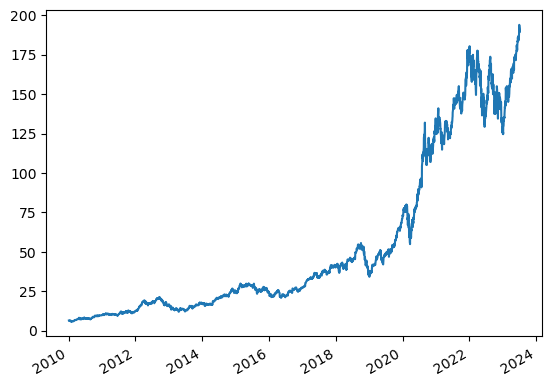

In [3]:
df['AAPL'].plot()

We expect daily returns to be roughly normally distributed; are they? Let's pick some tickers at random.

In [4]:
tickers = df.columns.to_series().sample(n=5)
tickers

D          D
MTD      MTD
STX      STX
ISRG    ISRG
BWA      BWA
dtype: object

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


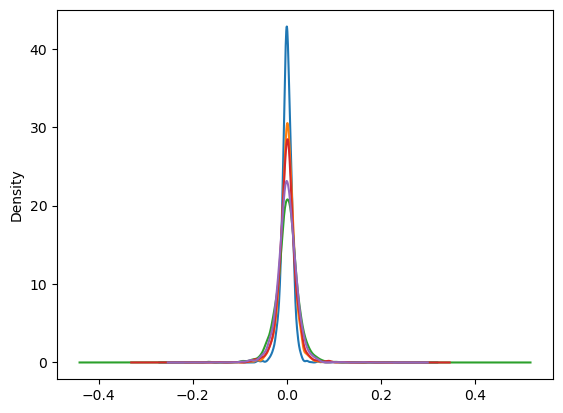

In [5]:
for ticker in tickers:
    df[ticker].pct_change(1).plot(kind='kde')

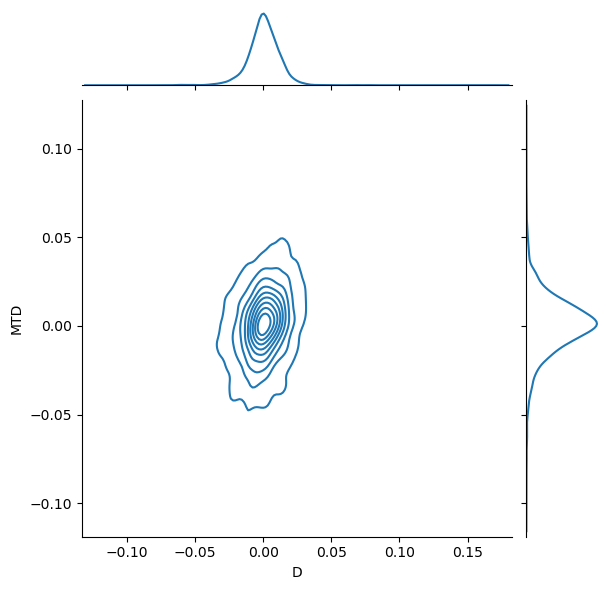

In [6]:
# look at the joint distribution of the first two tickers
from seaborn import jointplot
daily_df = pd.DataFrame(data={ticker: df[ticker].pct_change(1) for ticker in tickers})
jointplot(data=daily_df, x=tickers[0], y=tickers[1], kind='kde')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


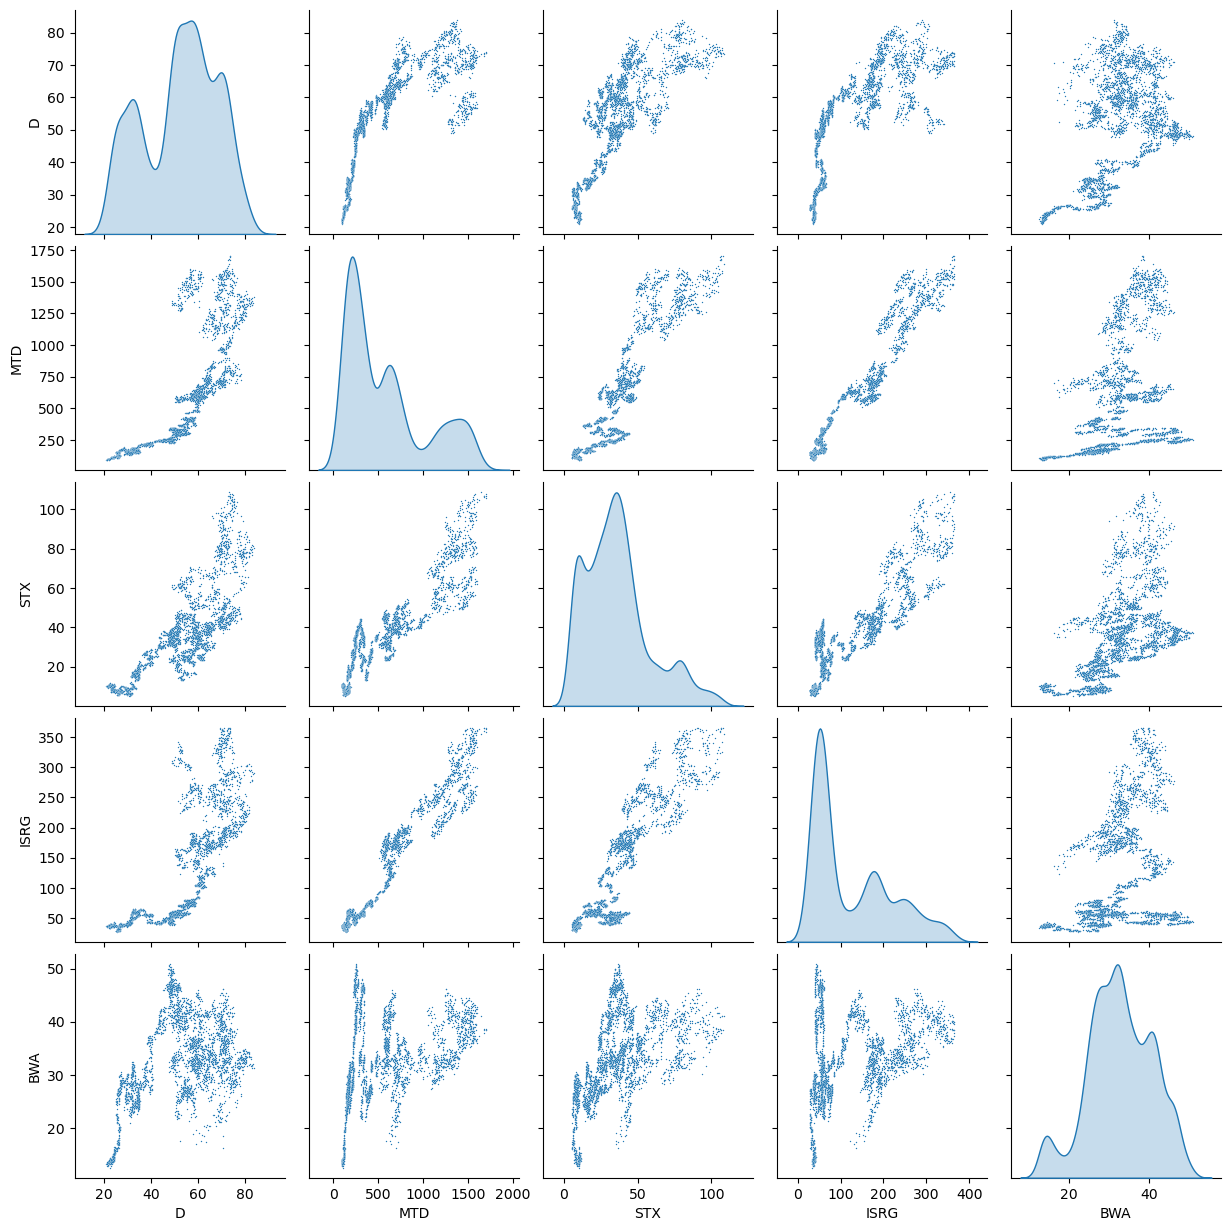

In [7]:
from seaborn import pairplot
pairplot(data=df[tickers], plot_kws={'s': 1}, diag_kind='kde')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


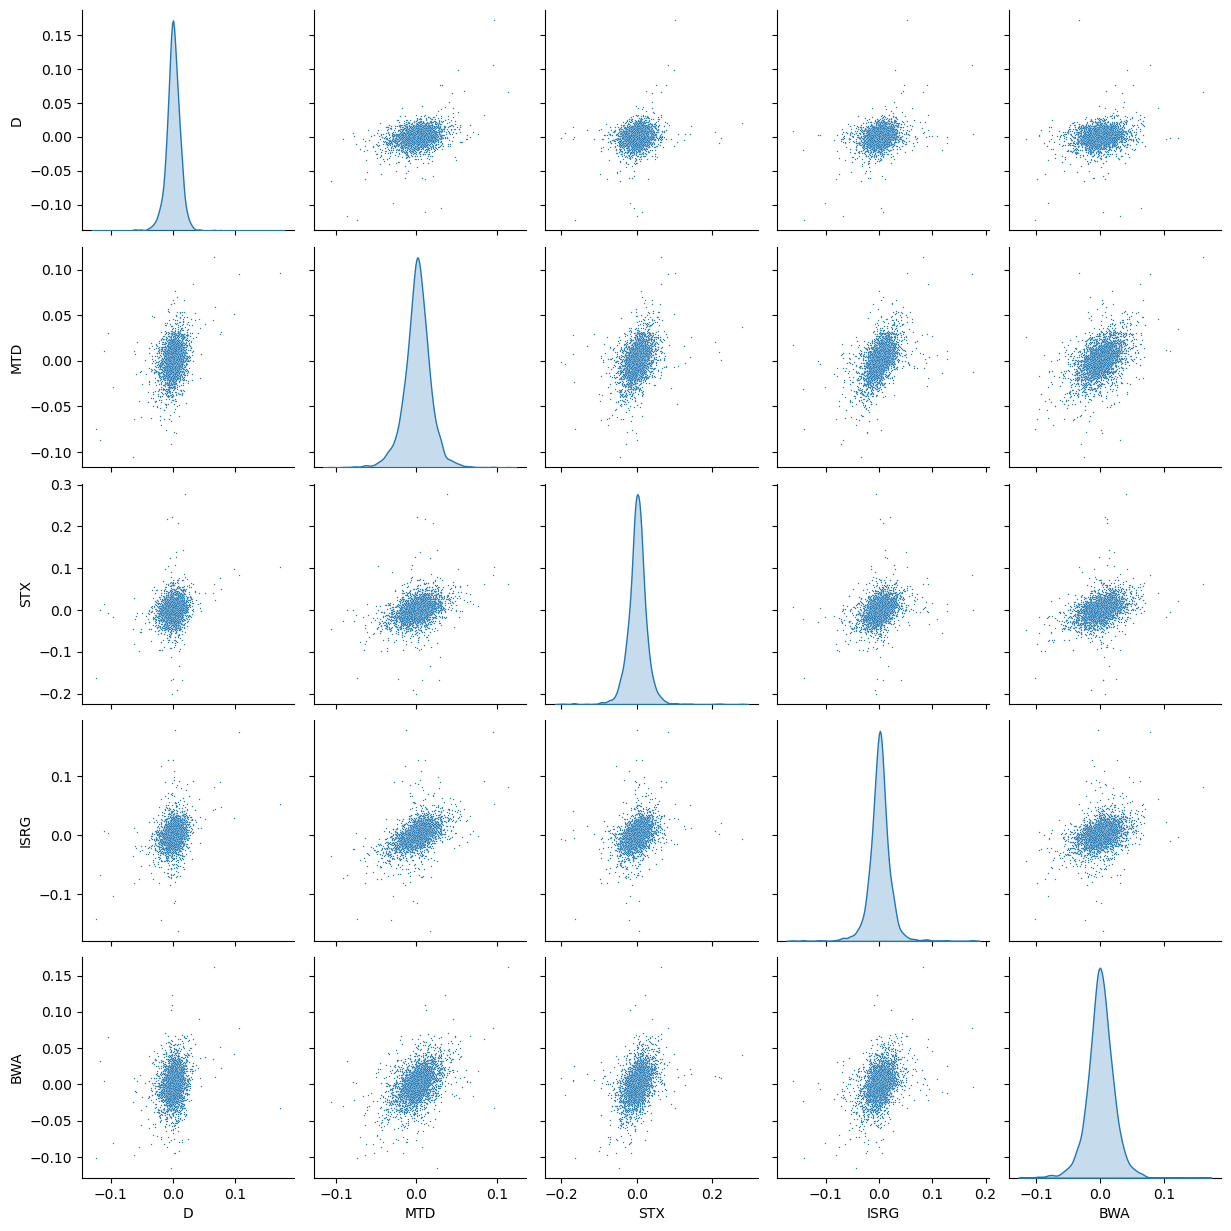

In [8]:
pairplot(data=daily_df, plot_kws={'s': 1}, diag_kind='kde')